In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from bertopic import BERTopic


# Download the necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Define a basic list of stop words
stop_words = set(stopwords.words('english'))

# Add 'singapore' and 'singaporean' to the list of stop words
stop_words.update(['mr', 'ms', 'want', "got", "say", "thing", "come", "going", "think"])

# Initialize the lemmatizer
wnl = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lower case
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize (split into individual words)
    words = word_tokenize(text)
    
    # Lemmatize and remove stopwords
    words = [wnl.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(words)

# Load your data
# Load the data
df = pd.read_excel("NDR_Collated (21June2023).xlsx")

# Concatenate the 'NDR' values for each unique 'Year'
grouped_df = df.groupby(['Year ', 'Prime_Minister'])['NDR'].apply(' '.join).reset_index()


# Apply preprocessing to the 'NDR' column
grouped_df['processed_NDR'] = grouped_df['NDR'].apply(preprocess_text)
#filter grouped_df by year 
Year1991to1997df = grouped_df[(grouped_df['Year '] >= 1991) & (grouped_df['Year '] <= 1997)]
Year1998to2002df = grouped_df[(grouped_df['Year '] >= 1998) & (grouped_df['Year '] <= 2002)]
Year2003to2007df = grouped_df[(grouped_df['Year '] >= 2003) & (grouped_df['Year '] <= 2007)]
Year2008to2012df = grouped_df[(grouped_df['Year '] >= 2008) & (grouped_df['Year '] <= 2012)]
Year2013to2017df = grouped_df[(grouped_df['Year '] >= 2013) & (grouped_df['Year '] <= 2017)]
Year2018to2022df = grouped_df[(grouped_df['Year '] >= 2018) & (grouped_df['Year '] <= 2022)]




c:\Users\Debby\Anaconda3\envs\ml\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Debby\Anaconda3\envs\ml\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Debby\Anaconda3\envs\ml\Lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarni

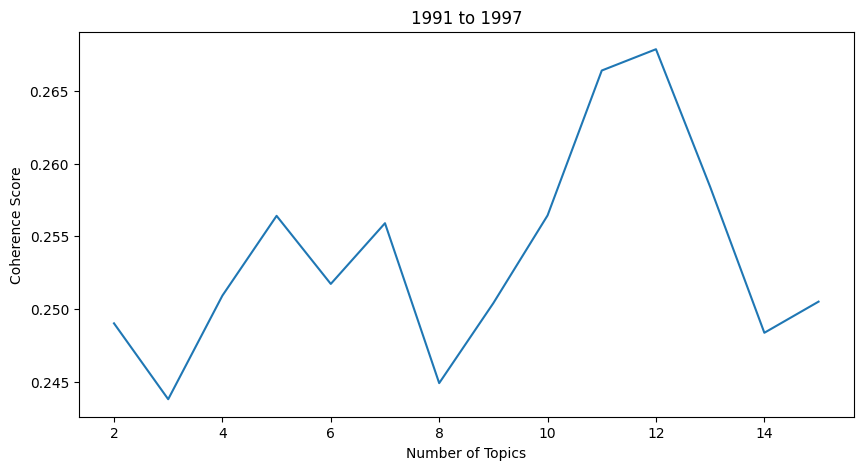

In [6]:
#1991 to 1997 

import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from gensim.models.ldamodel import LdaModel



from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Perform vectorization on preprocessed speeches
dtm = vectorizer.fit_transform(Year1991to1997df['processed_NDR'])



# Convert the document-term matrix into a gensim corpus
corpus = gensim.matutils.Sparse2Corpus(dtm, documents_columns=False)

# Create a mapping of word IDs to words
id2word = corpora.Dictionary.from_corpus(corpus, id2word=dict((v, k) for k, v in vectorizer.vocabulary_.items()))

# Define the range of number of topics to evaluate
min_topics, max_topics = 2, 15

coherence_scores = []

for num_topics in range(min_topics, max_topics+1):
    # Train an LDA model
    lda = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=0)
    
    # Calculate the coherence score
    coherence_model = CoherenceModel(model=lda, texts=Year1991to1997df['processed_NDR'].apply(word_tokenize), dictionary=id2word, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot the coherence scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(min_topics, max_topics+1), coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title("1991 to 1997")
plt.show()


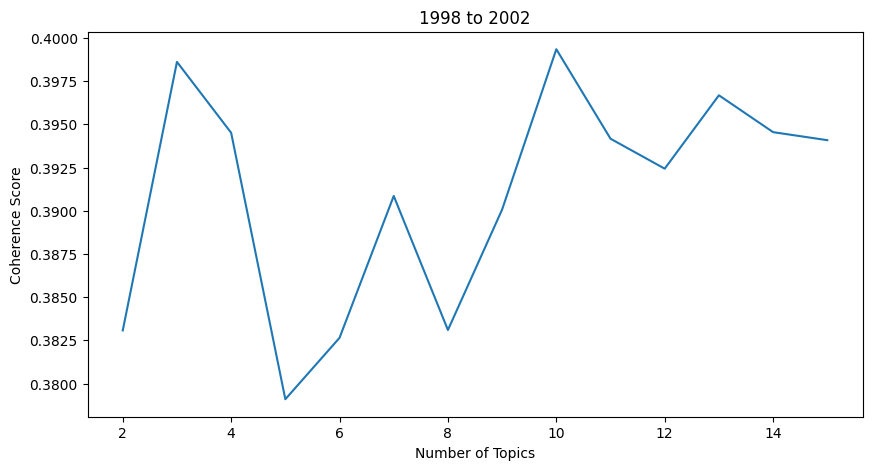

In [7]:
#1998 to 2002

import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from gensim.models.ldamodel import LdaModel


# Initialize CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Perform vectorization on preprocessed speeches
dtm = vectorizer.fit_transform(Year1998to2002df['processed_NDR'])


# Convert the document-term matrix into a gensim corpus
corpus = gensim.matutils.Sparse2Corpus(dtm, documents_columns=False)

# Create a mapping of word IDs to words
id2word = corpora.Dictionary.from_corpus(corpus, id2word=dict((v, k) for k, v in vectorizer.vocabulary_.items()))

# Define the range of number of topics to evaluate
min_topics, max_topics = 2, 15

coherence_scores = []

for num_topics in range(min_topics, max_topics+1):
    # Train an LDA model
    lda = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=0)
    
    # Calculate the coherence score
    coherence_model = CoherenceModel(model=lda, texts=Year1998to2002df['processed_NDR'].apply(word_tokenize), dictionary=id2word, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot the coherence scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(min_topics, max_topics+1), coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title("1998 to 2002")
plt.show()


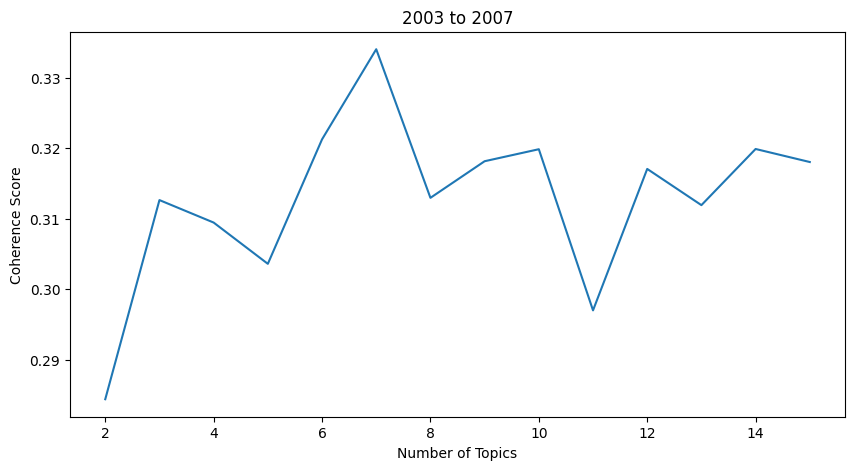

In [8]:
#2003 to 2007

import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from gensim.models.ldamodel import LdaModel


# Initialize CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Perform vectorization on preprocessed speeches
dtm = vectorizer.fit_transform(Year2003to2007df['processed_NDR'])

# Convert the document-term matrix into a gensim corpus
corpus = gensim.matutils.Sparse2Corpus(dtm, documents_columns=False)

# Create a mapping of word IDs to words
id2word = corpora.Dictionary.from_corpus(corpus, id2word=dict((v, k) for k, v in vectorizer.vocabulary_.items()))

# Define the range of number of topics to evaluate
min_topics, max_topics = 2, 15

coherence_scores = []

for num_topics in range(min_topics, max_topics+1):
    # Train an LDA model
    lda = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=0)
    
    # Calculate the coherence score
    coherence_model = CoherenceModel(model=lda, texts=Year2003to2007df['processed_NDR'].apply(word_tokenize), dictionary=id2word, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot the coherence scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(min_topics, max_topics+1), coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title("2003 to 2007")
plt.show()


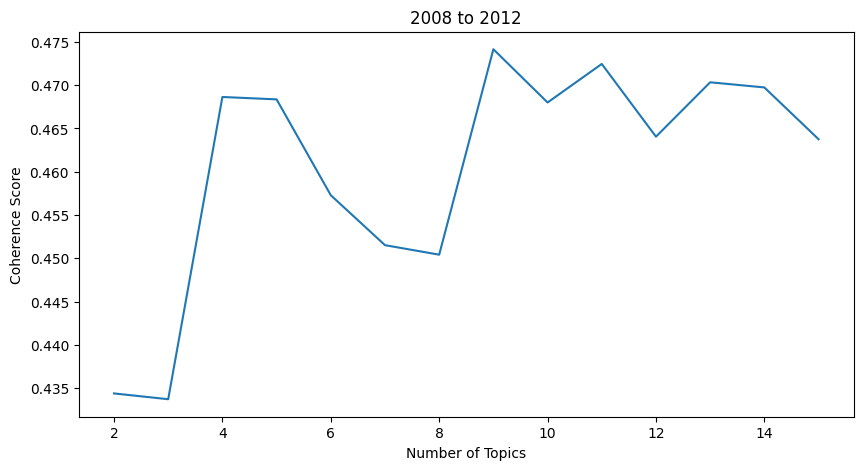

In [9]:
#2008 to 2012

import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Perform vectorization on preprocessed speeches
dtm = vectorizer.fit_transform(Year2008to2012df['processed_NDR'])



# Convert the document-term matrix into a gensim corpus
corpus = gensim.matutils.Sparse2Corpus(dtm, documents_columns=False)

# Create a mapping of word IDs to words
id2word = corpora.Dictionary.from_corpus(corpus, id2word=dict((v, k) for k, v in vectorizer.vocabulary_.items()))

# Define the range of number of topics to evaluate
min_topics, max_topics = 2, 15

coherence_scores = []

for num_topics in range(min_topics, max_topics+1):
    # Train an LDA model
    lda = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=0)
    
    # Calculate the coherence score
    coherence_model = CoherenceModel(model=lda, texts=Year2008to2012df['processed_NDR'].apply(word_tokenize), dictionary=id2word, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot the coherence scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(min_topics, max_topics+1), coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title("2008 to 2012")
plt.show()


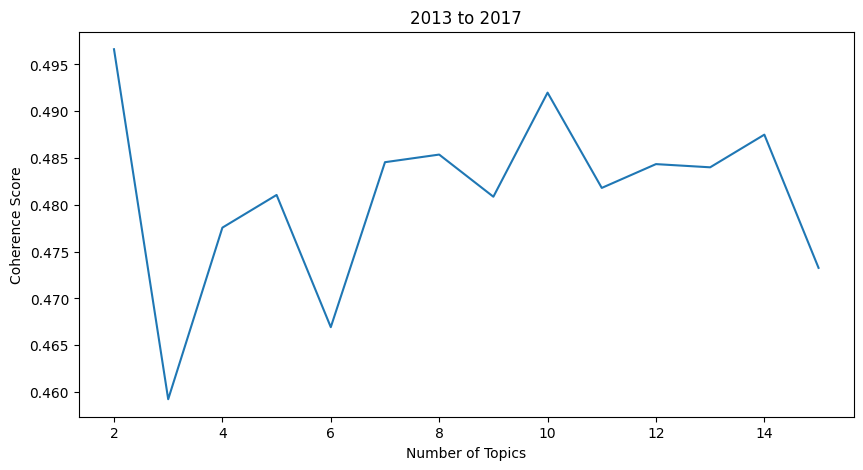

In [10]:
#2013 to 2017

import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Perform vectorization on preprocessed speeches
dtm = vectorizer.fit_transform(Year2013to2017df['processed_NDR'])



# Convert the document-term matrix into a gensim corpus
corpus = gensim.matutils.Sparse2Corpus(dtm, documents_columns=False)

# Create a mapping of word IDs to words
id2word = corpora.Dictionary.from_corpus(corpus, id2word=dict((v, k) for k, v in vectorizer.vocabulary_.items()))

# Define the range of number of topics to evaluate
min_topics, max_topics = 2, 15

coherence_scores = []

for num_topics in range(min_topics, max_topics+1):
    # Train an LDA model
    lda = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=0)
    
    # Calculate the coherence score
    coherence_model = CoherenceModel(model=lda, texts=Year2013to2017df['processed_NDR'].apply(word_tokenize), dictionary=id2word, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot the coherence scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(min_topics, max_topics+1), coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title("2013 to 2017")
plt.show()


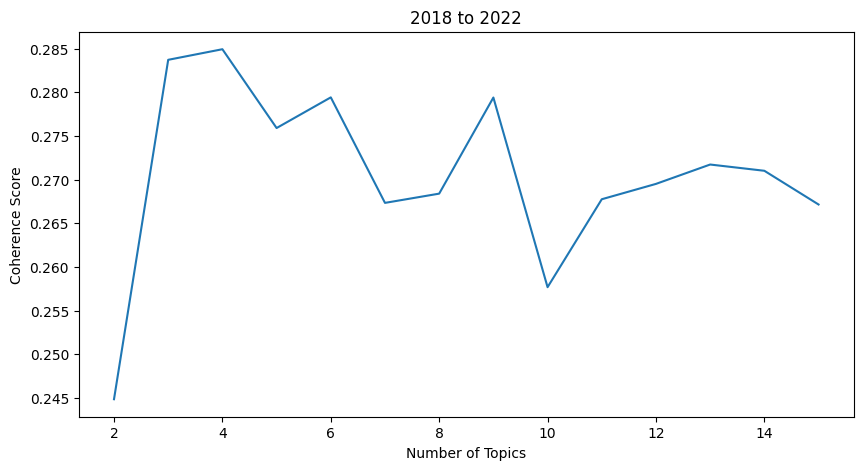

In [11]:
#2018 to 2022

import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from gensim.models.ldamodel import LdaModel


# Initialize CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Perform vectorization on preprocessed speeches
dtm = vectorizer.fit_transform(Year2018to2022df['processed_NDR'])





# Convert the document-term matrix into a gensim corpus
corpus = gensim.matutils.Sparse2Corpus(dtm, documents_columns=False)

# Create a mapping of word IDs to words
id2word = corpora.Dictionary.from_corpus(corpus, id2word=dict((v, k) for k, v in vectorizer.vocabulary_.items()))

# Define the range of number of topics to evaluate
min_topics, max_topics = 2, 15

coherence_scores = []

for num_topics in range(min_topics, max_topics+1):
    # Train an LDA model
    lda = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=0)
    
    # Calculate the coherence score
    coherence_model = CoherenceModel(model=lda, texts=Year2018to2022df['processed_NDR'].apply(word_tokenize), dictionary=id2word, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot the coherence scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(min_topics, max_topics+1), coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title("2018 to 2022")
plt.show()


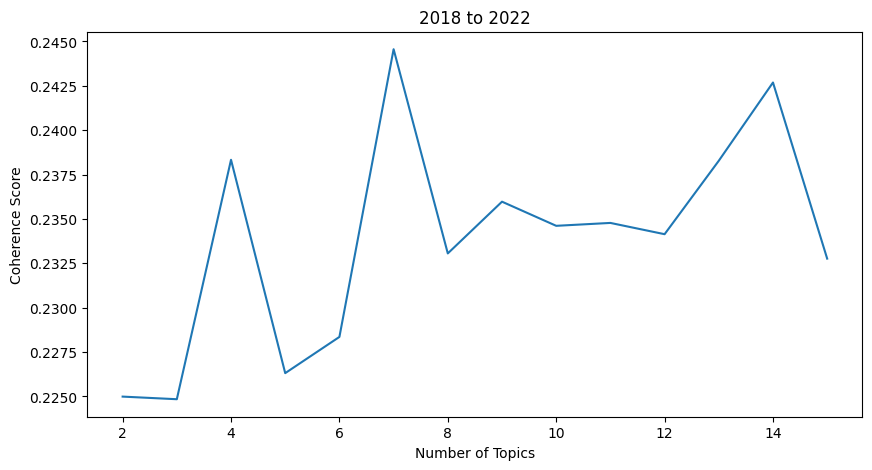

In [12]:
#ALL YEARS

import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from gensim.models.ldamodel import LdaModel


# Initialize CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Perform vectorization on preprocessed speeches
dtm = vectorizer.fit_transform(grouped_df['processed_NDR'])


# Convert the document-term matrix into a gensim corpus
corpus = gensim.matutils.Sparse2Corpus(dtm, documents_columns=False)

# Create a mapping of word IDs to words
id2word = corpora.Dictionary.from_corpus(corpus, id2word=dict((v, k) for k, v in vectorizer.vocabulary_.items()))

# Define the range of number of topics to evaluate
min_topics, max_topics = 2, 15

coherence_scores = []

for num_topics in range(min_topics, max_topics+1):
    # Train an LDA model
    lda = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=0)
    
    # Calculate the coherence score
    coherence_model = CoherenceModel(model=lda, texts=grouped_df['processed_NDR'].apply(word_tokenize), dictionary=id2word, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot the coherence scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(min_topics, max_topics+1), coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title("2018 to 2022")
plt.show()


In [13]:

num_topics = 7

lda = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=0)


def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)] = ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)] = ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)


AttributeError: 'LdaModel' object has no attribute 'components_'

In [21]:
# Vectorize your data (replace 'NDR' with the name of your text column)
data_vectorized = vectorizer.transform(Year2013_2022df['NDR'])

# Get the document-topic distribution
doc_topic_dist = lda.transform(data_vectorized)

# Add the probabilities as new columns to your dataframe
for topic in range(doc_topic_dist.shape[1]):
    Year2013_2022df[f'topic_{topic}_prob'] = doc_topic_dist[:, topic]


# Get the topic probability columns
topic_cols = [f'topic_{i}_prob' for i in range(10)] 

# Get the topic probability ranks
topic_cols_rank = [f'topic_{i}_prob_rank' for i in range(10)] 


# Rank the topic probabilities within each row
Year2013_2022df[topic_cols_rank] = Year2013_2022df[topic_cols].rank(axis=1, ascending=False, method='min')

# Since rank() gives the highest rank to the highest number, we subtract all ranks from 10 (the number of topics)
# to reverse the order. This makes the highest probability get a rank of 0, the second highest a rank of 1, and so on.
#Year2013_2022df[topic_cols_rank] = 9 - Year2013_2022df[topic_cols_rank]

# Convert the ranks to integers
Year2013_2022df[topic_cols_rank] = Year2013_2022df[topic_cols_rank].astype(int)




KeyError: "['topic_7_prob', 'topic_8_prob', 'topic_9_prob'] not in index"

In [34]:
grouped_df.to_excel("NDR_Collated (21June2023)_abc.xlsx")